# Project 1: Hadley Centre Sea Surface Temperature
**Data Source**: http://www.metoffice.gov.uk/hadobs/hadsst3/

## Task 1
Produce a line plot showing the SST for globe from 1850 to the present. Include the
global, northern hemisphere, southern hemispheric, and tropical region trends.

## Task 2
Produce a contour plot or other plot to visualize the global SST a single month. Make
sure to account for missing values.

In [2]:
# --- Load Modules --------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, cm        # Mapping package
import cmocean  
%matplotlib inline

# Simply doesn't display deprecation warnings that are pesky.
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [56]:
# --- Functions -----------------------------------------------
def make_line_plot(x, data, color='k', linesty='-'):
    plt.plot(x, data, color=color, linestyle=linesty,
            linewidth=1)
    
# Basemap
def setup_map(ax):
    m = Basemap(projection='eck4',
                lon_0=180,
                lat_0=0,
                resolution='c',
                ax=ax)    
    m.drawcoastlines(linewidth=0.5, color="#A9A9A9")
    m.fillcontinents(color='#D3D3D3', lake_color=None)
    m.drawparallels(np.arange(-90, 91, 20),
                    labels=[0,0,0,0], fontsize=14)
    m.drawmeridians(np.arange(-180, 181, 20),
                    labels=[0,0,0,0])
    m.drawmapboundary()
    return(m)

In [50]:
# --- File I/O ------------------------------------------------
# .txt files
strings   = ["dat/HadSST.3.1.1.0_annual_globe_ts.txt", "dat/HadSST.3.1.1.0_annual_nh_ts.txt", 
             "dat/HadSST.3.1.1.0_annual_sh_ts.txt", "dat/HadSST.3.1.1.0_annual_tropics_ts.txt"]
hadGlobal = np.loadtxt(strings[0])
hadNH     = np.loadtxt(strings[1])
hadSH     = np.loadtxt(strings[2])
hadTropic = np.loadtxt(strings[3])

# Define time series
x = hadGlobal[:, 0] # x axis for all plots, just years.

# Annual SSTs
SST = {
    'globe' : hadGlobal[:, 1],
    'NH'    : hadNH[:, 1],
    'SH'    : hadSH[:, 1],
    'tropic': hadTropic[:, 1]
}

# Load in .nc file
med_monthly = Dataset("dat/HadSST.3.1.1.0.median.nc", "r")
monthly_SST = med_monthly.variables['sst'][:]
lat         = med_monthly.variables['latitude'][:]
lon         = med_monthly.variables['longitude'][:]
data        = monthly_SST[1992, :, :] # plot this

# Create meshgrid
[X, Y] = np.meshgrid(lon, lat)

# Deal with missing values
data_masked   = np.ma.masked_invalid(data)
masked_colors = plt.cm.RdBu_r
masked_colors.set_bad(color = '#000000', alpha = 1.)

In [108]:
# + + + Task for week 2 : Produce annual time series from gridded data + + + 
mon_masked   = np.ma.masked_invalid(monthly_SST)
temp         = np.ma.mean(mon_masked, axis=2)
mon_dat      = np.ma.mean(temp, axis=1)

ann_dat = np.empty(x.shape)

# 12 month averages
counter = 0
for idx in np.arange(0, mon_dat.shape[0], 12):
    ann_dat[counter] = np.mean(mon_dat[idx:idx+12])
    counter = counter + 1

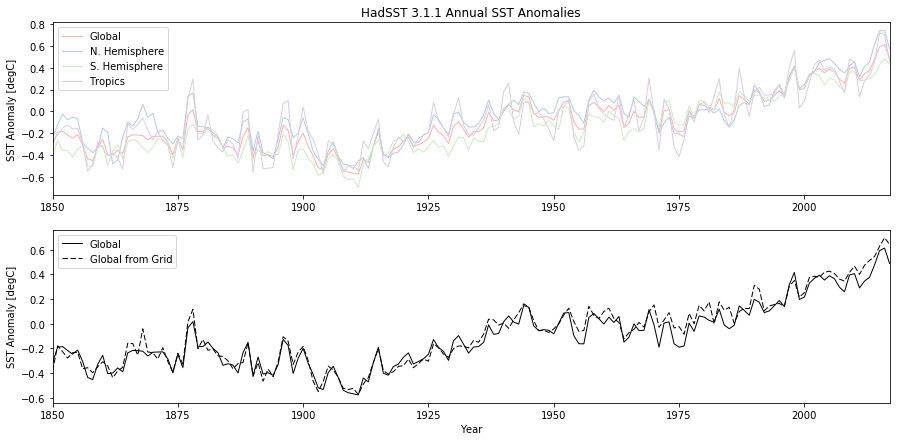

In [141]:
# --- Line Visualization --------------------------------------
colors = ["#fbb4ae", "#b3cde3", "#ccebc5",
         "#decbe4"]

fig = plt.figure(figsize = (15,7))
ax  = fig.add_subplot(2, 1, 1)
make_line_plot(x, SST['globe'], color=colors[0]) # Global
make_line_plot(x, SST['NH'], color=colors[1])
make_line_plot(x, SST['SH'], color=colors[2])
make_line_plot(x, SST['tropic'], color=colors[3])
leg = plt.legend(['Global', 'N. Hemisphere', 'S. Hemisphere', 'Tropics'], loc='best')

# Comparison between global estimates
ax2 = fig.add_subplot(2, 1, 2)
make_line_plot(x, SST['globe'])
make_line_plot(x, ann_dat, linesty='--')

# Legend
leg = plt.legend(['Global', 'Global from Grid'], loc='best')

# Set axis limits
ax.set_xlim(1850, 2017)
ax.set_xticks(np.arange(1850, 2020, 25))
ax.set_ylabel('SST Anomaly [degC]')
ax.set_title('HadSST 3.1.1 Annual SST Anomalies')


ax2.set_xlim(1850, 2017)
ax2.set_xticks(np.arange(1850, 2020, 25))
ax2.set_xlabel('Year')
ax2.set_ylabel('SST Anomaly [degC]')

plt.show()

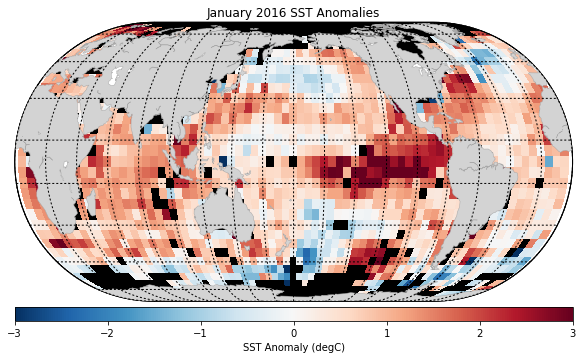

In [58]:
# --- Projection Visualization ---------------------------------
fig = plt.figure(figsize = (10,10))
ax  = fig.add_subplot(1, 1, 1)
m = setup_map(ax)
cf = m.pcolormesh(X, Y, data_masked, latlon=True, vmin=-3, vmax=3, cmap=masked_colors)
ax.set_title("January 2016 SST Anomalies")
m.colorbar(cf, location="bottom", label="SST Anomaly (degC)")

plt.show()

# Component 2
- Tasked to project the data onto a map (already done above), but also need to cover the NaNs.
- Tasked to add a line to the above time series with your own region.